In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('data.csv', sep=',', index_col='id')

In [11]:
rating_stats_by_year = dict()
subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics',
            'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc', 'numerical']
years = [13, 14, 15, 16, 17]
df_for_each_course = [
    df[['year', 'calculus', 'algebra', 'discrete']],
    df[['year', 'ode', 'mechanics', 'complex']],
    df[['year', 'prob_and_stat', 'pde', 'functional']],
    df[['year', 'optimization', 'random_proc', 'numerical']]
]
i = 1

for course in df_for_each_course:
    rating_stats_by_year[i] = {}

    for year in years:      
        current_course_df = course[course['year'] == year].drop(columns=['year'])
        current_course_df = current_course_df.apply(lambda x: x.value_counts())
        current_course_df = current_course_df.sum(axis=1)
        
        if not current_course_df.empty:
            current_course_df.index.astype(int)
            rating_stats_by_year[i][year+1] = current_course_df

    i += 1

#### Динамика успеваемости по первому курсу


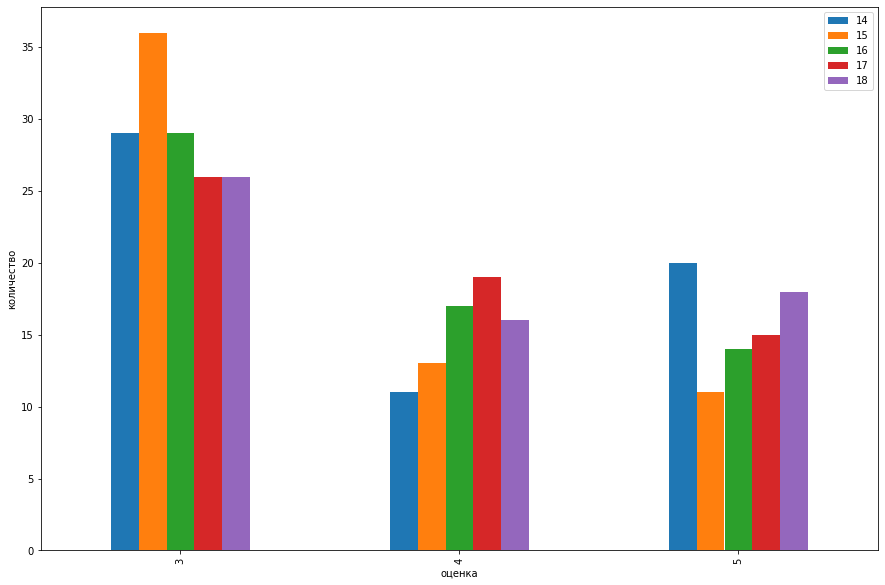

In [5]:
ax = pd.DataFrame(rating_stats_by_year[1]).plot(kind='bar', figsize=(15,10))
ax.set_ylabel('количество')
ax.set_xlabel('оценка');


#### Динамика успеваемости по второму курсу


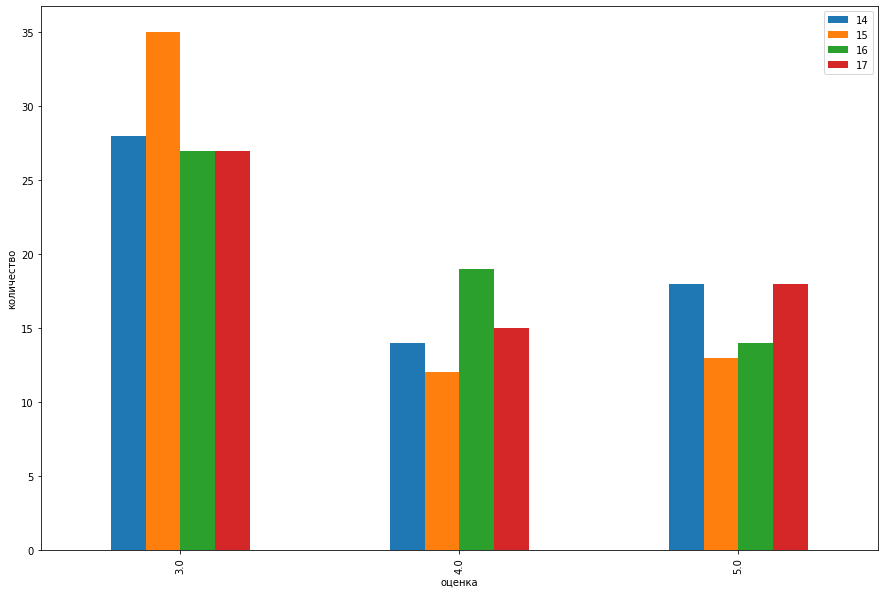

In [6]:
ax = pd.DataFrame(rating_stats_by_year[2]).plot(kind='bar', figsize=(15,10))
ax.set_ylabel('количество')
ax.set_xlabel('оценка');


#### Динамика успеваемости по третьему курсу


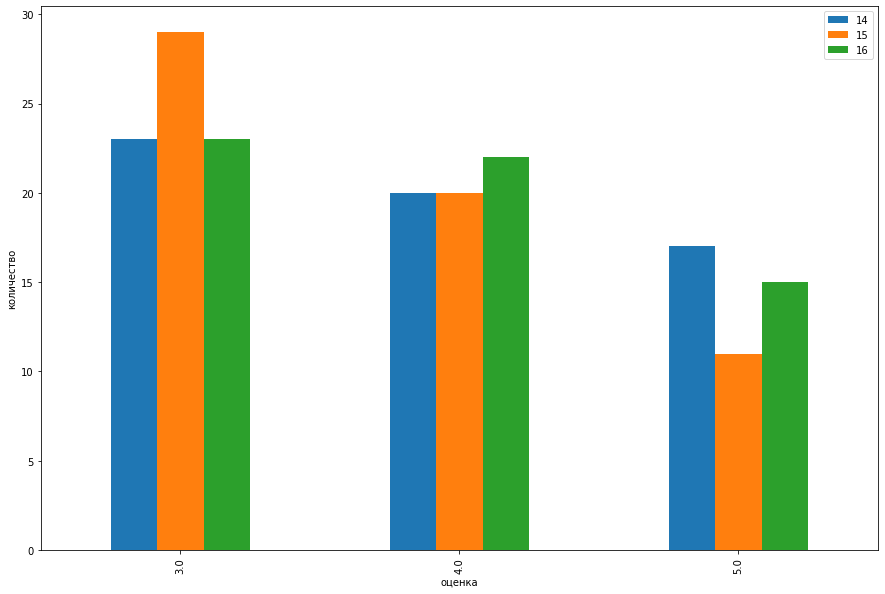

In [7]:
ax = pd.DataFrame(rating_stats_by_year[3]).plot(kind='bar', figsize=(15,10))
ax.set_ylabel('количество')
ax.set_xlabel('оценка');


#### Динамика успеваемости по четвертому курсу


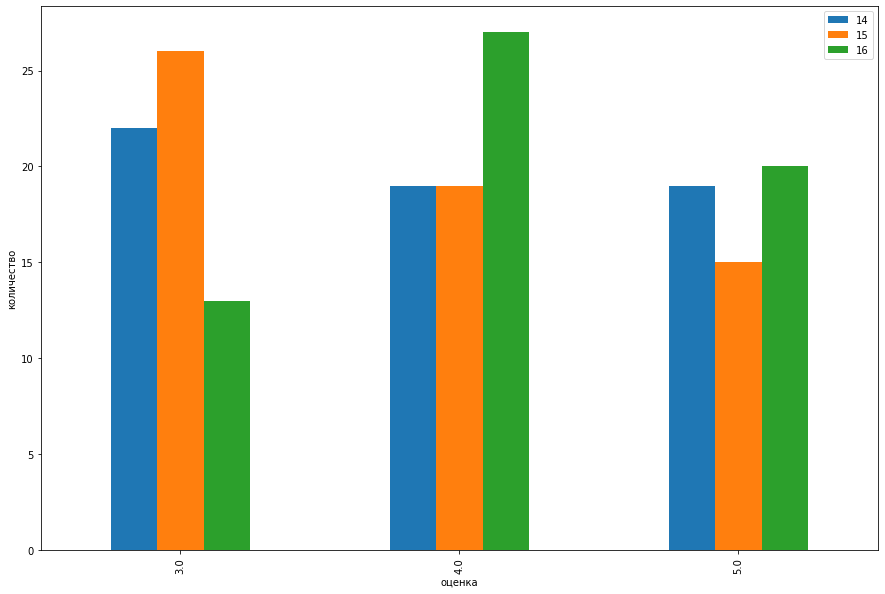

In [74]:
ax = pd.DataFrame(rating_stats_by_year[4]).plot(kind='bar', figsize=(15,10))
ax.set_ylabel('количество')
ax.set_xlabel('оценка');

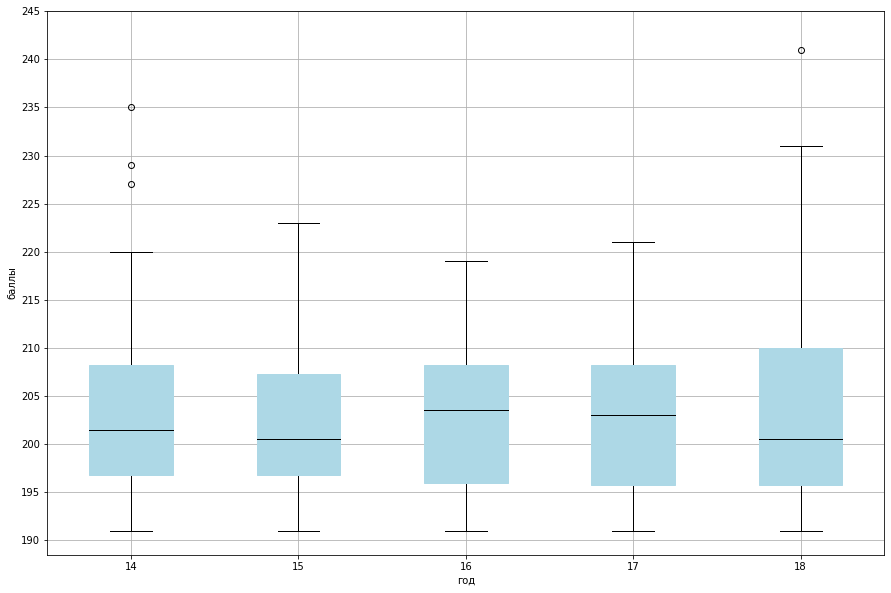

In [8]:
ege_df = df[['year', 'ege']]
ege_df_by_year = dict()

for year in years:
    year_df = ege_df[ege_df['year'] == year].drop(columns=['year'])
    ege_df_by_year[year+1] = year_df['ege'].tolist()

box_props = dict(boxes='lightblue', whiskers="black", medians="black", caps="black")
ege_df = pd.DataFrame.from_dict(ege_df_by_year)
ax = ege_df.plot.box(figsize=(15,10), color=box_props, patch_artist=True)
ax.set_ylabel('баллы')
ax.set_xlabel('год')
ax.grid()
ax.set_yticks(np.arange(190, 250, 5));

#### Корреляция баллов ЕГЭ и средней оценки


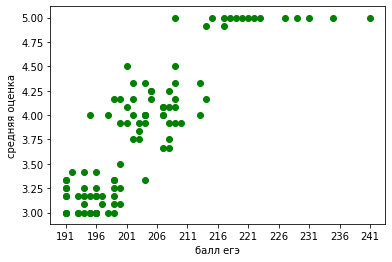

In [29]:
df['mean'] = df[subjects].mean(axis=1)
mean_rating = df['mean'].tolist()
ege = df['ege'].tolist()

plt.scatter(ege, mean_rating, c='green')

plt.ylabel('средняя оценка')
plt.xlabel('балл егэ')
plt.xticks(np.arange(min(ege), max(ege)+1, 5))
plt.show()

In [36]:
print("Correlation between ege and mean rating", df.corr()['mean']['ege'])



Correlation between ege and mean rating 0.8628485121196521
